<h1>
    <center>
        Causas de muerte en el mundo
    </center>
</h1>

<h2>
    <center>
        Marta Criado González
        <br> <br>
        Octubre 2020
    </center>
</h2>

<hr>

## Import de librerías utilizadas
Aquí se importan todas las librerías que se usan en este notebook

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

***

## POBLACIÓN

Los siguientes apartados corresponden a los que utilizan el fichero `population.csv`

In [206]:
pop_file = './population.csv'

### Apartado a) 

__En las páginas de World in Dats puedes encontrar una tabla csv sobre el crecimiento de la población mundial por países (Population growth by country). Diseña una función que cargue dicha tabla y genere un diccionario, que para cada país y cada año, nos dé su población.__

__Ten cuidado, además de los países, esta tabla contiene información de regiones (Europa por ejemplo), con o sin código, y del mundo entero.__


El ejercicio está completo en su totalidad. Además la función diseñada controla que el fichero exista en la carpeta del notebook y que tenga el formato adecuado

In [207]:
def read_population(pop_file):
    """
    Lee un fichero, lo parsea line a linea eliminando el caracter de fin de línea.
    Crea un diccionario con el nombre del pais como clave y como valor otro diccionario anidado
    Este diccionario anidado tiene como clave el año y como valor la población. 
    En caso de que hubiera varios valores de población para el mismo año y país se añadirían
    
    Parameters
    ----------
    pop_file: STR
        nombre del fichero a leer
        Precondición: tiene que existir dentro de la carpeta donde esté situado este notebook, debe ser formato csv
        
    Returns
    ---------
    population : DICTIONARY {STR: DICTIONARY}
        diccionario de diccionarios que contiene la población por pais, código y año
        Los años y el numero de población están convertidos a tipo integer para sus posteriores usos
    """
    population = {}
    assert os.path.exists(pop_file), 'El fichero no existe en la carpeta del notebook'
    assert pop_file.endswith('.csv'), 'El fichero no tiene la extensión adecuada'
    with open(pop_file, 'r') as f:
        header = f.readline()
        for line in f:
            country, code, year, num_population = line.replace('\n','').split(',')
            if country not in population:
                population[country] = {int(year): int(num_population)}
            else:
                if year not in population[country]:
                    population[country][int(year)] = int(num_population)
                else:
                    population[country][int(year)] += int(num_population)
    return population

In [208]:
population_dict = read_population(pop_file)

#### Pruebas del apartado A)
1. Imprimo las 10 primeras claves del resultado de `read_population()`. Corresponden a los paises
2. Información por año de la población mundial
3. Población en Suecia en el año 1960

In [209]:
print('Prueba 1: Los 10 primeros paises del diccionario son: ')
print(list(population_dict.keys())[:10])

print('\n')
print('Prueba 2: La población mundial de todos los años es: \n' + str(population_dict['World']))

print('\n')
print('Prueba 3: Suecia tenia una población de %s habitantes en 1960' % str(population_dict['Sweden'][1960]))

Prueba 1: Los 10 primeros paises del diccionario son: 
['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina']


Prueba 2: La población mundial de todos los años es: 
{-10000: 2431214, -9000: 3564407, -8000: 5136461, -7000: 7561695, -6000: 11461003, -5000: 17920172, -4000: 28370428, -3000: 44819892, -2000: 72108128, -1000: 115065664, 1: 188239088, 100: 195062192, 200: 202309552, 300: 205316560, 400: 208909840, 500: 210429840, 600: 212642768, 700: 225835008, 800: 240487648, 900: 268747456, 1000: 295040192, 1100: 352606912, 1200: 393081024, 1300: 392403520, 1400: 389774816, 1500: 461367648, 1600: 553956096, 1700: 603167552, 1750: 811562112, 1800: 989818304, 1850: 1262682112, 1900: 1650000000, 1901: 1659947520, 1902: 1669996544, 1903: 1680114944, 1904: 1690269440, 1905: 1700426240, 1906: 1710550656, 1907: 1720606976, 1908: 1730558976, 1909: 1740369408, 1910: 1750000000, 1911: 1759443072, 1912: 1768814592, 1913:

***

### Apartado b) 
__Como simples demostraciones, diseña expresiones o funciones que calculen lo siguiente:__
- __La población española en 1800__
- __La población mundial (El mundo tiene sus propios registros en la tabla csv bajo el nombre “World” y el código “OWID_WRL”) en los años 10.000, 9.000, 8.000, …, 1.000 antes de la era común.__
- __El incremento de la población en Europa entre dos años dados. Esto se ha de resolver con una función cuyos requisitos indiquen los años posibles de uso.__

El apartado está completo en su totalidad. Además la función diseñada para el tercer punto controla el tipo de sus argumentos y que el año final sea mayor o igual que el año inicial

In [210]:
def get_pobspain(data):
    '''
    Calcula la población de España en el año 1800
    Parameters
    ----------
    data: DICTIONARY {STR: DICTIONARY}
        diccionario con los datos de todos los países. 
        Este diccionario es el obtenido por la función read_population() 
        definida en celdas superiores
    
    Returns
    --------
    result: INT
        población de España para 1800
    '''
    result = data['Spain'][1800]
    return result

In [211]:
def get_worldpob_bc(data):
    """
    Calcula la población mundial en los años antes de la era común (años mayores que cero)
    
    Parameters
    -----------
    data : DICTIONARY {STR: DICTIONARY}
        diccionario de población para todos los paises y años.
        Este diccionario es el obtenido por la función read_population() 
        definida en celdas superiores
    
    Returns
    --------
    result: LIST OF TUPLES 
        lista de tuplas en la que cada elemento corresponde al año (posterior al año cero) y su población mundial
    """
    
    result = []
    for year, num_pob in data.get('World').items():
        if year < 0:
            result.append((year,num_pob))
    return result

In [212]:
def get_inc_eupob(data, init_year, end_year):
    """
    Calcula el incremento de población en Europa entre dos años dados por parametro
    
    Parameters
    ----------
    data: DICTIONARY {STR: DICTIONARY}
        Este diccionario es el obtenido por la función read_population() 
        definida en celdas superiores
    init_year: INT
        Año inicial por el que filtrar. Debe ser menor o igual que el argumento end_year. 
        Tiene que estar entre 0 y 2017
        Para la clave 'World' puede ser un valor negativo entre -1000 y 0
    end_year: INT
        Año final por el que filtrar. Debe ser mayor o igual que el argumento init_year.
        Tiene que estar entre 0 y 2017
        Para la clave 'World' puede ser un valor negativo entre -1000 y 0
    Returns 
    --------
    result : FLOAT
        Incremento de población en Europa entre init_year y end_year
    
    En caso de que no existan datos para init_year o para end_year la función elevará una excepción
    """
    assert type(init_year) is int, 'El año inicial no es un entero'
    assert type(end_year) is int, 'El año final no es un entero'
    assert end_year >= init_year, 'El año final es menor que el inicial'
    try:
        result = float(data['Europe'][end_year] -  data['Europe'][init_year])
    except:
        raise Exception('El año inicial o el año final no tienen datos para Europa')
    return result

#### Pruebas del apartado B)
1. Prueba de la función `get_pobspain()`
2. Prueba del resultado de la función `get_worldpob_bc()`
3. Prueba con ejecución correcta de `get_inc_eupob()`.El incremento de la población entre los años 1990 y 1991
4. Prueba con ejecución incorrecta de `get_inc_eupob()`, El año inicial es mayor que el final

In [213]:
print('Prueba 1: La población de España en el año 1800 era %d' % get_pobspain(population_dict))
print('Prueba 2:')
for elem in get_worldpob_bc(population_dict):
    print('Para el año %s la población era %s' % (str(elem[0]), str(elem[1])))

print('Prueba 3:\nEl incremento de población en Europa es: %d' % (get_inc_eupob(population_dict,1990, 1991)))
print('Prueba 4:\nEl incremento de población en Europa es: %d' % (get_inc_eupob(population_dict,1990, 1800)))

Prueba 1: La población de España en el año 1800 era 11549294
Prueba 2:
Para el año -10000 la población era 2431214
Para el año -9000 la población era 3564407
Para el año -8000 la población era 5136461
Para el año -7000 la población era 7561695
Para el año -6000 la población era 11461003
Para el año -5000 la población era 17920172
Para el año -4000 la población era 28370428
Para el año -3000 la población era 44819892
Para el año -2000 la población era 72108128
Para el año -1000 la población era 115065664
Prueba 3:
El incremento de población en Europa es: 1918016


AssertionError: El año final es menor que el inicial

***

### Apartado c) 
__Diseña ahora una función que genere una tabla de datos con las poblaciones de los distintos países entre dos años dados como parámetros (por ejemplo, entre 2007 y 2016). Esta tabla puede ser una simple lista de listas, o un array (de numpy) o un dataframe (de pandas) o incluso un diccionario.__

Apartado completo en su totalidad. Primero carga del fichero en una tabla de datos de Pandas y después genera una función que realiza la tabla de datos con las poblaciones de todos los países entre dos años. La función controla el tipo de los argumentos (año inicial, año final), que el año final sea myor o igual que el inicial, y que los años sean mayores que cero

__Importante__: la variable `population` donde se guardan los datos del fichero `population.csv` se utilizará en otros apartados como argumento de la función

In [214]:
population= pd.read_csv(pop_file)

In [215]:
def create_table(df, init_year,  end_year):
    """
    Crea un dataframe con la poblacion de todos los países entre dos años dados por parametro
    
    Parameters
    ----------
    df: DATAFRAME
        Tabla de datos guardada en la variable population
    init_year: INT
        Año inicial por el que filtrar. Debe ser menor o igual que el argumento end_year.
        Tiene que estar entre 0 y 2017 y ser menor o igual que el año final. 
        Para la clave 'World' puede ser un valor negativo entre -1000 y 0
    end_year: INT
        Año final por el que filtrar. Debe ser mayor o igual que el argumento init_year.
        Tiene que estar entre 0 y 2017 y ser mayor o igual que el año final. 
        Para la clave 'World' puede ser un valor negativo entre -1000 y 0
          
    Returns
    --------
    result: DATAFRAME
        tabla de datos con la población de los países entre dos años pasados como argumento de la función
    """
    
    assert type(init_year) is int
    assert type(end_year) is int
    assert end_year >= init_year, 'El año final es menor que el inicial'
    assert init_year > 0, 'Año inicial es menor o igual que 0'
    assert end_year > 0, 'Año final es menor o igual que 0'
    result = df.loc[df.loc[:, 'Year'].between(init_year, end_year), : ]
    return result

#### Pruebas del apartado C)
1. Prueba con ejecución correcta de la función `create_table()`. Imprime una muestra de la tabla de datos obtenida
2. Prueba con ejecución incorrecta de la función `create_table()`. El año inicial es mayor que el final

In [216]:
print('Prueba 1:')
print(create_table(population,1980, 1985).head())

print('\nPrueba 2: ')
print(create_table(population,1985, 1980))

Prueba 1:
          Entity Code  Year  Total population (Gapminder, HYDE & UN)
180  Afghanistan  AFG  1980                                 13357000
181  Afghanistan  AFG  1981                                 13172000
182  Afghanistan  AFG  1982                                 12883000
183  Afghanistan  AFG  1983                                 12538000
184  Afghanistan  AFG  1984                                 12204000

Prueba 2: 


AssertionError: El año final es menor que el inicial

***

### Apartado d) 
__Sería ideal mostrar la evolución de la población mundial entre dos fechas dadas, de la era común, y compararla con la de un país (otro parámetro). Para que los gráficos sean apreciables, convendría cambiar la escala del país, y lógicamente esa escala dependerá de la población del país, de manera que la función correspondiente tendrá que calcular esa escala con algún criterio razonable.__

Apartado completo en su totalidad. La función controla que el argumento `country` sea de tipo string. 

__Importante__: es necesario haber ejecutado la línea `population=pd.read_csv()` anteriormente definida para ejecutar esta función. Explicación sobre el escalado de los datos en el fichero `documentacionProyecto.pdf` situado en la misma carpeta que este notebook

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
def world_pob_evolution(df, country, init_year, end_year):
    """
    Invoca a la funcion create_table para obtener una tabla de datos filtrada por dos años.
    Esta tabla es filtrada de nuevo por el país pasado como argumento de la función y la entidad 'World'
    Se genera una pivot table para tener como columnas el pais y 'World' y como indices los años dentro del intervalo
    por el que se filtra. Los valores de esta tabla serán la población mundial y la población del país
    
    Parameters
    ----------
    df: DATAFRAME
        Tabla de datos obtenida de la lectura del fichero population.csv, se define con la variable population
    country: STR
        País por el que se quiere filtrar. Tiene que estar dentro de la lista de paises que forman la columna Entity
    init_year: INT
        Año inicial por el que filtrar. Tiene que estar entre 0 y 2017 y ser menor o igual que el año final. 
        Para la clave 'World' puede ser un valor negativo entre -1000 y 0
    end_year: INT
        Año final por el que filtrar. Tiene que estar entre 0 y 2017 y ser mayor o igual que el año final.
        Para la clave 'World' puede ser un valor negativo entre -1000 y 0
    
    Returns
    -------
    result: DATAFRAME
        Tabla de datos cuyas columnas son el país y 'World', cuyos índices son los años dentro del intervalo filtrado
        y los valores la población del país y la población mundial
    
    """
    scaler = MinMaxScaler()
    assert type(country) is str, 'El pais debe ser un string'
    year_filtered = create_table(df, init_year,  end_year)
    country_filtered = year_filtered.loc[year_filtered['Entity'].isin([country, 'World'])]
    result = pd.pivot_table(country_filtered, values='Total population (Gapminder, HYDE & UN)', index=['Year'], columns=['Entity'])
    result[[country, 'World']] = scaler.fit_transform(result[[country, 'World']])
    return result

In [219]:
def plot_chart(data):
    """
    Dibuja una gráfica con los datos de población total de un país entre el rango de años que se pasa por parametro.
    Dibuja otra gráfica con los datos de población total mundial entre el rango de años pasado por parametro.
    Se unen ambas gráficas en la misma figura.
    
    Parameters
    -----------
    data: DATAFRAME
        Tabla de datos obtenida de la función world_pob_evolution definida en la celda anterior
    """
    fig = plt.figure(figsize=(20,10))
    my_xticks = [str(elem) for elem in data.index]
    plt.xticks(data.index, my_xticks)
    plt.plot(data.index, data.iloc[:,0] ,marker='o',label='World data')
    plt.plot(data.index, data.iloc[:,1] ,marker='D',label='%s data' % data.columns[0])
    plt.legend()
    plt.show()

#### Pruebas del apartado D)
- Prueba 1: Muestra de la ejecución correcta de la función `world_pob_evolution()`
- Prueba 2: Pinta la gráfica con la tabla de datos de la función anterior

In [220]:
world_pob_evolution(population, 'Spain', 1970, 2000).head(5)

Entity,Spain,World
Year,,
1970,0.000000,0.000000
1971,0.055179,0.030831
1972,0.112376,0.061895
1973,0.170725,0.093057
1974,0.229362,0.124171


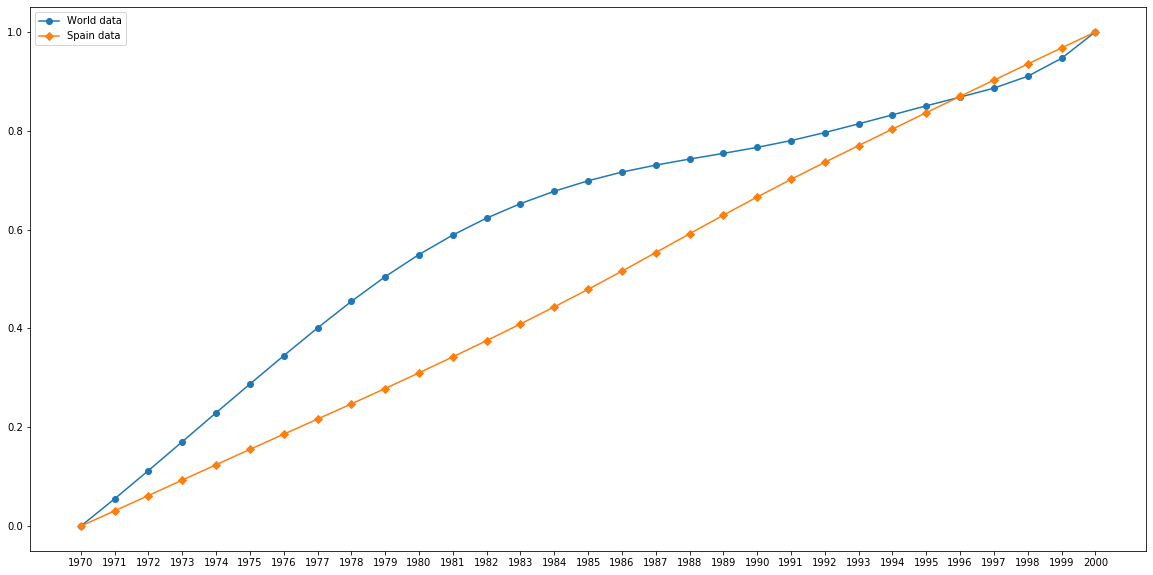

In [221]:
plot_chart(world_pob_evolution(population, 'Spain', 1970, 2000))

***

## CAUSAS DE MUERTE

__Vamos ahora con la mortalidad. La información mostrada en la _Figura 1_ se pueden ver también en forma de tabla seleccionando el año (desde 2007 hasta 2016), y lo que es más útil, estos datos también están disponibles al completo en una tabla csv `annual-number-of-deaths-by-cause.csv` que, para cada país y año, contiene el número de muertes por distintas causas:__


### Apartado e) 
__Prepara una función que cargue los datos en una tabla, en el formato que te parezca más adecuado, teniendo en cuenta su utilidad en los apartados siguientes. Por unos pocos ejemplos de su uso similares a los planteados en el apartado b).__

Apartado completo en su totalidad.   
__Importante__: la variable `deaths` que se genera en este apartado se utilizará en siguientes apartados  
__Importante__: Tras hacer un primer análisis del fichero que se va a leer he detectado que en la columna `Number of executions(Amnesty International)` existe el valor `>1` y `>1000`. Si se intenta sumar estos valores con el resto de las filas de esa columna dará un error puesto que ese valor no puede ser transformado a tipo numérico como el resto. Por tanto, lo que he decidido con este número es eliminar el carácter '>' y sumar la cantidad que está a continuación. 

In [222]:
annual_deaths = './annual-number-of-deaths-by-cause.csv'

In [223]:
def read_annual_deaths(annual_deaths_file):
    '''
    Lee el csv pasado como argumento y lo transforma en una tabla de datos. Como todos los nombres de las 
    columnas del dataframe siguen un patrón `Deaths - Causa - Sex: Both - Age: All Ages (Number)` realizo un 
    split por el delimitador ' - ' y me quedo solo con la causa de muerte. En caso de que haya algún error en la lectura 
    del fichero o en el cambio de nombre de columnas se elevará una excepción
    
    Parameters
    -----------
    annual_deaths_file: STR
        fichero csv con los datos del número de muertes por año, país y causa. El fichero debe existir en la misma carpeta
        donde esté ubicado este notebook y debe ser formato csv
        
    Returns
    --------
    result_df: DATAFRAME
        tabla de datos que contiene el número de muertes por año, país y causa. Las columnas están renombradas para facilitar
        la elección de una columna en posteriores funciones
    '''
    try:
        result_df = pd.read_csv(annual_deaths_file)
        new_cols = [col.split(' - ')[1].strip() if len(col.split('-'))>1 else col.split('-')[0] for col in result_df]
        cols = {}
        for old_col, new_col in zip(result_df.columns, new_cols):
            cols.update({old_col:new_col})
        result_df.rename(columns=cols, inplace=True)
        result_df.iloc[:,3]=result_df.iloc[:,3].str.replace('>','')
        result_df.iloc[:,3]=result_df.iloc[:,3].astype(float)
    except Exception as e:
        raise e
    return result_df

In [224]:
deaths = read_annual_deaths(annual_deaths)

#### Pruebas del apartado e)
Prueba para comprobar que el nuevo nombre de las columnas no tiene el prefijo 'Deaths -' ni el sufijo  '- Sex: Both - Age: All Ages (Number)'

In [225]:
deaths.columns

Index(['Entity', 'Code', 'Year',
       'Number of executions (Amnesty International)', 'Road injuries',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Tuberculosis', 'HIV/AIDS', 'Diarrheal diseases',
       'Intestinal infectious diseases', 'Lower respiratory infections',
       'Meningitis', 'Drowning', 'Alzheimer disease and other dementias',
       'Parkinson disease', 'Alcohol use disorders', 'Drug use disorders',
       'Malaria', 'Maternal disorders', 'Neonatal disorders',
       'Nutritional deficiencies', 'Diabetes mellitus',
       'Chronic kidney disease', 'Chronic respiratory diseases',
       'Conflict and terrorism', 'Hepatitis', 'Neoplasms',
       'Fire, heat, and hot substances', 'Poisonings',
       'Exposure to forces of nature', 'Environmental heat and cold exposure',
       'Protein-energy malnutrition', 'Cardiovascular diseases', 'Self-harm',
       'Interpersonal violence', 'Terrorism (deaths)'],
      dtype='object')

***

### Apartado f)
__Diseña una función que, para una causa de muerte (“Road injuries” por ejemplo), calcule las tasas de muerte en un país (“Spain” por ejemplo) y año (2015 por ejemplo), donde una tasa está calculada como el número de muertes por esa causa en ese país y año por cada 10000 habitantes.__

Apartado completo

In [226]:
def compute_death_rate(deaths_df, population_df, death_cause, countries, year):
    """
    Calcula la tasa de muerte de un país y un año. Se calcula la tasa de muerte por una causa dada. 
    Explicación más detallada de la función en el fichero de documentación
    
    Parameters
    ----------
    deaths_df: DATAFRAME
        tabla de datos que contiene el número de muertes por causa, año y país.
        Variable deaths calculada en celdas anteriores
    population_df: DATAFRAME
        tabla de datos que contiene la población por país y año. Variable population calculada en celdas anteriores
    death_cause: STR
        Causa de la muerte. Tiene que ser un string y una de las columnas del dataframe 
    countries: LIST (STR)
        lista de países de los que se quiere obtener la tasa de muerte. Tiene que ser un string y existir en la columna
        'Entity' de deaths_df
    year:INT
        año del que se quiere obtener la tasa de muerte. Tiene que ser un numero entero y estar entre 0 y 2017
    
    Returns 
    ----------
    DATAFRAME: tabla de datos con la tasa de muerte
    """
    assert isinstance(countries, list)
    assert type(year) is int
    assert year > 0
    assert type(death_cause) is str
    assert death_cause in deaths_df.columns, 'La causa de muerte no se encuentra en la tabla de datos'
    result_df = deaths.merge(population, on=['Entity', 'Code', 'Year'], how='inner')
    result_df['Death Rate'] = result_df.apply(lambda x: (x[death_cause]/x['Total population (Gapminder, HYDE & UN)'])*10000, axis=1)
    death_rate = result_df.loc[(result_df['Entity'].isin(countries)) & (result_df['Year']==year)]
    return death_rate.filter(items=['Entity','Death Rate'])

#### Pruebas del apartado F)


In [227]:
compute_death_rate(deaths, population, 'Road injuries', ['Spain', 'Sweden'], 2001)

,Entity,Death Rate
4621,Spain,1.563140
4761,Sweden,0.716569


***

### Apartado g)
__Algunas de las funciones anteriores o pequeñas variantes suyas nos resultarán útiles para generar un gráfico adecuado que nos permita comparar la mortalidad por una causa en un año, en una colección de países.__

Apartado completo. Las pruebas se generan con la llamada a la función `compute_death_rate()`. En mi caso no he visto necesario generar una nueva función, sino que he generado una expresión en una celda para pintar la gráfica que pide el enunciado

In [242]:
death_rate = compute_death_rate(deaths, population, 'Drowning', ['Spain', 'Sweden', 'Austria', 'Afghanistan'], 1994)

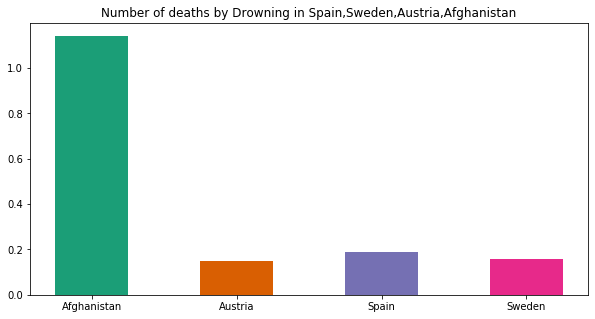

In [243]:
cmap = plt.get_cmap('Dark2')
fig_deaths_countries = plt.figure(figsize=(10,5))
plt.title('Number of deaths by %s in %s' % ('Drowning', ','.join(countries)))
plt.bar(death_rate['Entity'], death_rate['Death Rate'], color=cmap(range(len(countries))), width=0.5)
plt.show()

***

### Apartado h)
__Desearíamos saber el total de muertes en un año dado por cada causa. Esto se puede calcular de varias maneras. Te pido ahora que resuelvas este problema con un programa iterativo, que recorre países y va acumulando en un diccionario las cantidades de cada causa.__

Apartado completo  

In [244]:
def deaths_by_cause(df, in_year):
    """
    Crea un diccionario en el que las claves son los distintos años que aparecen en la columna Year y cuyo valor es la suma 
    de las muertes por causa dentro de ese año.
    En caso de que alguno de los valores de mortalidad por causa sea nulo se suma un cero 
    
    Parameters
    ----------
    df: STR
        Dataframe con la mortalidad por causa, año y país
        Variable deaths calculada en celdas anteriores
    in_year: INT
        año por el que filtrar. Debe ser un entero entre 0 y 2017
        
    Returns
    --------
    total_deaths: DICTIONARY{INT:LIST}
        diccionario con el numero de muertes por causa en un año determinado
    """
    assert type(in_year) is int, 'El año debe ser un entero'
    filtered_year = df.loc[df['Year']==in_year]
    total_deaths = {}
    for i,row in filtered_year.iterrows():
        for index, value in zip(row[3:].index.tolist(), row[3:].values.tolist()):
            if index not in total_deaths:
                total_deaths[index] = value if value is not np.nan else 0
            else:
                if math.isnan(value) is False:
                    total_deaths[index]+=value 
    return total_deaths

#### Prueba apartado h)

In [245]:
deaths_by_cause(deaths, 2015)

{'Number of executions (Amnesty International)': 4255.0,
 'Road injuries': 5842366.443341265,
 'Cirrhosis and other chronic liver diseases': 6011792.180901412,
 'Digestive diseases': 10840261.127685152,
 'Tuberculosis': 5515010.01166111,
 'HIV/AIDS': 5517308.0031886315,
 'Diarrheal diseases': 7035844.547199774,
 'Intestinal infectious diseases': 660032.2295830955,
 'Lower respiratory infections': 12176354.179123508,
 'Meningitis': 1402318.6624740595,
 'Drowning': 1431129.2422273746,
 'Alzheimer disease and other dementias': 11512644.330647472,
 'Parkinson disease': 1559240.2264585036,
 'Alcohol use disorders': 863027.2862800469,
 'Drug use disorders': 717201.2820330941,
 'Malaria': 3245224.3464558306,
 'Maternal disorders': 917242.3997131583,
 'Neonatal disorders': 8729383.95291039,
 'Nutritional deficiencies': 1345520.3079594842,
 'Diabetes mellitus': 6099272.470838468,
 'Chronic kidney disease': 5586455.757327987,
 'Chronic respiratory diseases': 17229402.161428332,
 'Conflict and te

***

### Apartado i)
__Te pido ahora que resuelvas el ejercicio anterior con la técnica map-reduce.__

### Apartado j)
__Diseña una colección de funciones que trabajan sucesivamente, cargando los datos, mostrando una parte pequeña de los mismos y, finalmente, generando una tabla como la de la Figura 1.__

Para el primero de los pasos, los datos ya han sido cargados en una tabla de datos en el apartado e)  
A continuación se muestran las 10 primeras filas de la tabla de datos cargada

In [68]:
deaths.head(10)

,Entity,Code,Year,Number of executions (Amnesty International),Road injuries,Cirrhosis and other chronic liver diseases,Digestive diseases,Tuberculosis,HIV/AIDS,Diarrheal diseases,...,Neoplasms,"Fire, heat, and hot substances",Poisonings,Exposure to forces of nature,Environmental heat and cold exposure,Protein-energy malnutrition,Cardiovascular diseases,Self-harm,Interpersonal violence,Terrorism (deaths)
0,Afghanistan,AFG,1990,NaN,4575.180311,1453.044977,3698.889864,4332.690583,32.098129,8817.260208,...,10061.873743,311.776082,170.742286,0.000000,226.789403,1607.703797,46498.085024,740.448500,1279.945985,12.0
1,Afghanistan,AFG,1991,NaN,4762.068567,1468.860745,3743.187336,4288.640464,37.524158,8588.463794,...,10171.333511,311.500538,172.032657,1349.999434,164.830417,1558.132316,46967.361037,762.245179,1524.641593,68.0
2,Afghanistan,AFG,1992,NaN,5531.136933,1524.528468,3894.366133,4475.257542,50.670559,8924.932420,...,10592.367581,338.614263,190.404111,614.000083,92.522183,1617.721576,48355.558515,856.912927,1684.808857,49.0
3,Afghanistan,AFG,1993,NaN,6613.963510,1598.643747,4136.479100,4909.050325,58.433049,11976.501319,...,11126.644646,382.401317,217.622614,109.999998,104.167461,1931.808553,50072.563899,975.603772,1906.959925,NaN
4,Afghanistan,AFG,1994,NaN,7341.204565,1649.977411,4318.692618,5352.634058,65.531176,13296.448475,...,11477.937575,417.717979,236.240573,160.000003,112.072652,2351.629206,51416.815442,1028.742412,2229.924043,22.0
5,Afghanistan,AFG,1995,NaN,7936.178185,1690.717095,4436.973375,5536.274369,72.735404,14767.431175,...,11711.273936,447.362217,249.757440,380.999985,118.013587,2507.115188,52072.368671,1065.582016,2325.997879,5.0
6,Afghanistan,AFG,1996,NaN,8270.543843,1716.645566,4510.381672,5560.655853,78.533651,14153.892087,...,11898.875427,458.002488,255.847563,69.999999,122.193282,2468.615820,52795.718158,1099.003806,2626.043189,31.0
7,Afghanistan,AFG,1997,NaN,8349.815930,1746.918412,4591.336368,5605.857165,83.752944,14351.353886,...,12109.522390,469.227613,262.027243,174.999985,127.044325,2451.122257,53512.784374,1133.020009,2394.441220,4.0
8,Afghanistan,AFG,1998,NaN,8300.970845,1768.987713,4646.843937,5584.296859,88.028383,14118.468804,...,12283.506788,474.351542,264.483854,7122.995478,130.426196,2390.544168,54063.861710,1160.633930,2577.706477,8.0
9,Afghanistan,AFG,1999,NaN,8006.464177,1770.085804,4658.561314,5483.224732,87.154703,13950.167626,...,12435.458669,469.032725,261.681129,70.000000,132.223075,2293.901006,54368.996167,1162.147866,2459.186742,39.0


Para crear el gráfico de la `Figura 1` es necesario filtrar el dataframe tanto en la columna `Year` por el año 2017 como en la columna `Entity` por la columna `World`. Para poder pintar de una manera limpia los gráficos reseteo el indice del dataframe y resultante y me quedo con las columnas que corresponden a las causas de muerte (obviando así las columnas `Entity, Code, Year`.
El resultado es ordenado por indice de manera descendente 

In [246]:
def filter_and_order(df):
    """
    Genera la gráfica de la Figura1 del pdf de los enunciados.
    Filtra por el año 2017 y el valor 'World' de la columna 'Entity' del dataframe de mortalidad y ordena por indice
    
    Parameters
    ----------
    df: DATAFRAME
        tabla de datos con el numero de muertes por causa, país y año. Variable deaths calculada en celdas anteriores

    Returns
    ----------
    res: DATAFRAME
        tabla de datos con una sola linea y con las distintas causas de muerte como columnas. Los valores son los datos
        de mortalidad por causa y estan ordenados de mayor a menor
    """
    res = df.loc[(df['Year']==2017) & (df['Entity']=='World')].reset_index(drop=True).iloc[:,3:]
    res.sort_values(by=0, axis=1, ascending=False, inplace=True)
    return res

In [247]:
def human_format(num):
    """
    Funcion auxiliar creada para realizar un formateo de las etiquetas de datos que se plasman en el gráfico. 
    Ejemplo: 1.000.000 se formateará como 1 million; 5.000 se formateará como 5K

    Parameters
    ----------
    num: INT
        numero de entrada a formatear

    Returns
    --------
    INT: numero formateado
    """
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.3f%s' % (num, ['', ' K', ' million'][magnitude])

In [248]:
def plot_fig1(df):
    """
    Funcion principal que pinta el gráfico en una barra horizontal. Se declara un mapa de colores de matplotlib para elegir
    los distintos colores de las barras. Para poder pintar las columnas de la tabla de datos como eje de ordenadas se realiza
    un match entre la variable y_values y los nombres de estas columnas. Este match está programado con plt.yticks()
    Por último para 
    Parameters
    ----------
    df: DATAFRAME
        tabla de datos con el numero de muertes por causa, país y año. Variable deaths calculada en celdas anteriores

    Returns
    --------
    None
    """
    cmap= plt.get_cmap("Dark2")
    fig= plt.figure(figsize=(22,10))
    num_ycols = len(df.iloc[0,:].index)
    
    y_values = [i for i in reversed(range(num_ycols))]
    x_values = df.iloc[0,:].values
    
    plt.yticks(y_values, df.iloc[0,:].index.values)
    plt.title('Number of deaths by cause, 2017')
    plt.barh(y_values,x_values, color=cmap(np.arange(8)))
    
    for y,x in zip(y_values,x_values):
        label = human_format(x)
        plt.annotate(label, (x,y), textcoords="offset points",xytext=(35,0), ha='center') 
    plt.show()

#### Prueba apartado j)
Dibuja la gráfica con los resultados de la función `filter_and_order()`

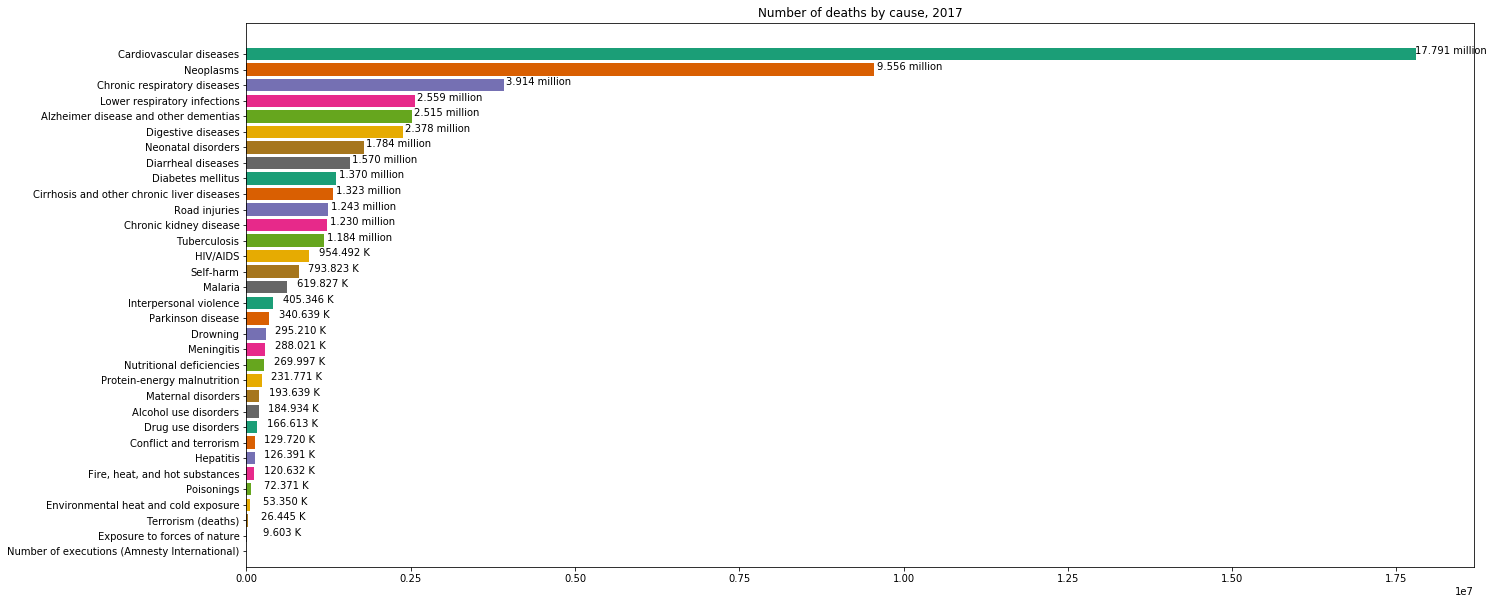

In [251]:
plot_fig1(filter_and_order(deaths))

### Apartado k)
__Versión más ambiciosa: comparando la tasa de los datos mundiales con la de un país (cantidades por millón de habitantes mundial y del país, en el año elegido)__  
Considero que este apartado está resuelto en su totalidad desde mi entendimiento del ejercicio. Las funciones generan una tabla de datos filtrada por año y país y se calcula la tasa de mortalidad por millón de habitantes utilizando el dataframe de la población creado anteriormente.  
Por último, se genera un gráfico con una escala logarítmica en el eje x para que los datos sean apreciables

In [252]:
def get_deaths_country_year(deaths_df, pop_df, country, year):
    """
    Genera una tabla de datos con la tasa de mortalidad por causa, país y año. Después filtra por año y país pasados
    por parametro. Ordena de mayor a menor los datos por filas
    
    Parameters
    ----------
    deaths_df: DATAFRAME
        tabla de datos cargada anteriormente que corresponde al numero de muertes por causa, país y año. 
        Variable deaths calculada en celdas anteriores
    pop_df: DATAFRAME
        tabla de datos cargada anteriormente que corresponde a la población de un país por año. 
        Variable population calculada en celdas anteriores
    country: STR 
        nombre del país del que se quieren obtener los datos. 
        Debe ser un string y estar dentro de la columna 'Entity' de pop_df
    year: INT
        año para el que se quieren obtener los datos. Deber ser un número entero entre 0 y 2017

    Returns
    ----------
    country_data: DATAFRAME
        tabla de datos con una sola linea y con las distintas causas de muerte como columnas. Los valores son los datos
        de mortalidad por causa para el país pasado como argumento y estan ordenados de mayor a menor
    
    world_data: DATAFRAME
        tabla de datos con una sola linea y con las distintas causas de muerte como columnas. Los valores son los datos
        de mortalidad por causa para los datos mundiales y estan ordenados de mayor a menor
    """
    assert type(year) is int, 'El año debe ser un número'
    assert type(country) is str, 'El pais debe ser un string'
    merged_df = deaths_df.merge(pop_df, on=['Entity', 'Code', 'Year'], how='inner')
    res = merged_df.loc[(merged_df['Year']==year) & (merged_df['Entity'].isin(['World', country]))].reset_index(drop=True)
    
    res.iloc[:,3:]= res.iloc[:,3:].div(res['Total population (Gapminder, HYDE & UN)'], axis=0)*1e6
    res.drop(['Total population (Gapminder, HYDE & UN)'], axis=1, inplace=True)
    
    country_data = res.loc[res['Entity']==country].iloc[:,3:].reset_index(drop=True)
    world_data = res.loc[res['Entity']=='World'].iloc[:,3:].reset_index(drop=True)
    
    country_data.sort_values(by=0, axis=1, ascending=False, inplace=True)
    world_data.sort_values(by=0, axis=1, ascending=False, inplace=True)

    return country_data, world_data

In [255]:
def plot_death_rate(df_world, df_country):
    """
    Funcion principal que pinta el gráfico en dos barras horizontales.  
    Para poder pintar las columnas de la tabla de datos como eje de ordenadas se realiza
    un match entre la variable y_values y los nombres de estas columnas. Este match está programado con plt.yticks()
    Por último para que los datos se aprecien mejor se presenta el eje de abscisas en escala logarítmica 
    
    Parameters
    ----------
    df_world: DATAFRAME
        tabla de datos filtrada que corresponde a la tasa de mortalidad mundial por causa. Debe ser la segunda
        de las variables que devuelve la funcion get_deaths_country_year()
        
    df_country: DATAFRAME
        tabla de datos filtrada que corresponde a la tasa de mortalidad de un pais elegido anteriormente por causa. 
        Debe ser la primera de las variables que devuelve la funcion get_deaths_country_year()

    Returns
    --------
    None
    """
    fig = plt.figure(figsize=(22,15))
    
    num_ycols = len(df_world.iloc[0,:].index)
    y_values = [i for i in reversed(range(num_ycols))]
    
    xc_values = df_country.iloc[0,:].values
    xw_values = df_world.iloc[0,:].values
    bar_size = 0.4
    plt.yticks(y_values, df_world.iloc[0,:].index.values)
    plt.title('Number of deaths by cause')
    plt.barh(y_values,xc_values, height=0.4, color='turquoise', edgecolor='black', label='Country data')
    plt.barh([val+bar_size for val in y_values],xw_values, height=0.4, color='coral', edgecolor='black', label='World data')
    fig.tight_layout()
    plt.xscale('log')
    plt.legend() 
    plt.show()

#### Prueba del apartado k.3)

In [257]:
country, world = get_deaths_country_year(deaths, population, 'Belgium', 2004)

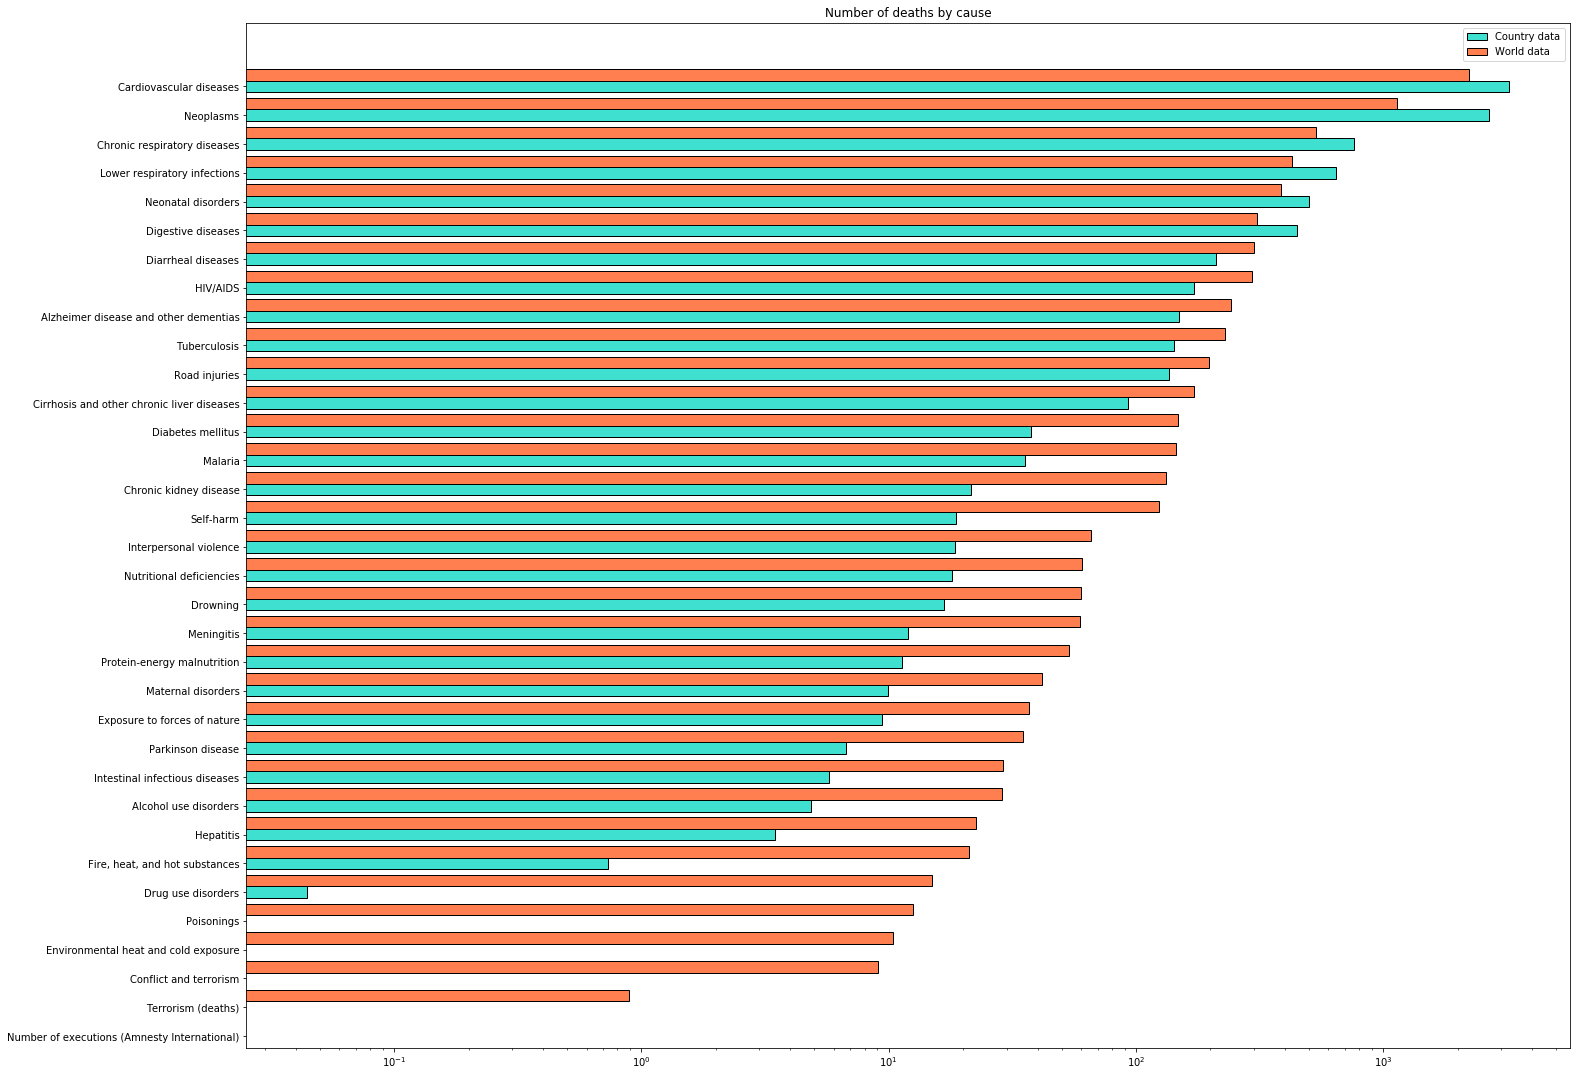

In [259]:
plot_death_rate(world, country)

### Datos personales

-   **Apellidos:** Criado González
-   **Nombre:** Marta
-   **Email:** martacriado_90@hotmail.com
-   **Fecha:** 13 de Octubre 2020

<hr>

### Ficha de autoevaluación

**Comentarios**: Los comentarios adicionales al notebook y las ayudas y fuentes están en el archivo `documentacionProyecto.pdf`

|Apartado|Calificación|Comentario|
|-|-|-|
|a) |1.5 / 1.5  |Completamente resuelto |
|b) |1.5 / 1.5 |Completamente resuelto |
|c) |1.5 / 1.5  |Completamente resuelto |
|d) |1.5 / 1.5  |Completamente resuelto |
|e) |1.5 / 1.5  |Completamente resuelto |
|f) |0.5 / 0.5  |Completamente resuelto |
|g) |0.5 / 0.5  |Completamente resuelto |
|h) |0.5 / 0.5  |Completamente resuelto |
|i) |0.3 / 0.5  |Tengo dudas sobre el entendimiento del ejercicio |
|j) |0.3 / 0.4  |La gráfica no es exactamente la misma que la Figura 1 por la escala del eje x |
|k) |0.05 / 0.1 |Resuelto a medias |
|**Total** |**9.65** / 10.0|**Notable**|


**Nota**: La valoración de cada apartado será la siguiente:

- Apartados a, b, c, d, e: 1.5 puntos
- Apartados f, g, h, i: 0.5 puntos
- Apartado j: 0.4 puntos
- Apartado k: 0.1 puntos
